> "Don't believe everything you read on the internet" - Abraham Lincoln

### Predicting Comment Engagement on a Reddit Post

Ah, Reddit. The place we all pretend to be unfamiliar with, to make ourselves seem more employable. But how can one possibly resist the front page of the internet, when it has something to offer everyone? Rarepuppers, slavs_squatting, BillyMaysMixtapes, there truly is a subreddit as unique and individual as each one of us.

Everyone loves to stop and browse the posts, but what makes someone stop, take time out of their day, and add their own comment? Can we predict the overall level of comment engagement, based solely on the metadata of the post itself? Of course you can! This would be a pretty awful blog post if you couldn't (well, more awful I mean).

---

## Data Scraping:

There's a lot of metadata attached to each post on the Reddit website. Unfortunately, there isn't a Reddit Data Walmart we can go to, pick up a box of 'data', and walk out. But luckily, we do have access to the web-hosted Reddit API (think of it more like an all-you-can-eat Chinese buffet, but it's out in the middle of the woods, you only have Mapquest directions, and it's printed on soggy paper so the ink is running).

Using the Reddit Praw (Python Reddit API Wrapper), we can request any number of posts matching any number of criteria, and access the metadata attached to those posts rather intuitively. Given that knowledge, I constructed a scraper that leverages Praw, hosted on Amazon Web Services, that:
    1. Scraped the top 500 posts from the front page every 15 minutes.
    2. Stored 19 features of metadata for each post scraped.
    3. Output a CSV checkpoint file every 4 hours (in case of an overall crash of the scraper)
    4. Terminated after 48 hours of run time.
    
This provided me exactly 96,000 rows of information, each representing a snapshot of a Reddit post at the time it was scraped. Neat.

---

## Fun Facts:

    - 2,876 unique posts made the "top 500" over the 48 hour period scrape
    - Each of those posts were created by 2,643 unique authors
    - Median Number of comments = 95
    - Average Number of Comments = 280
    - Maximum Number of Comments = 21,315!

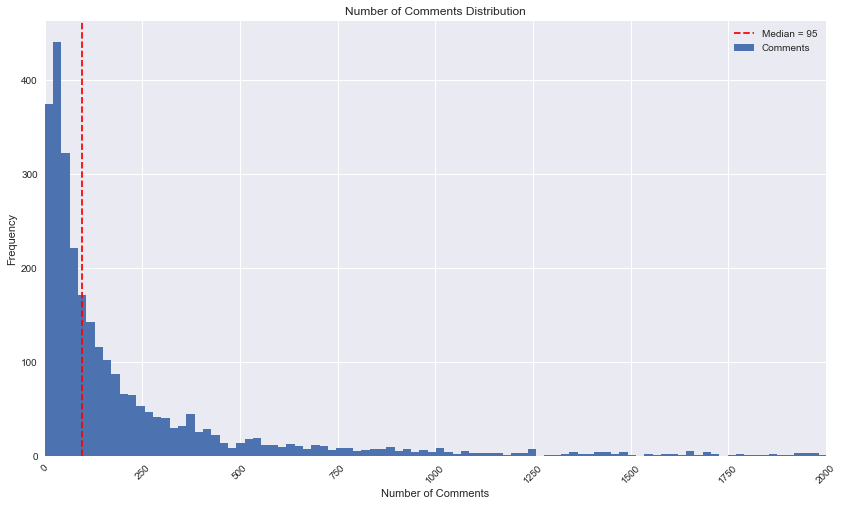

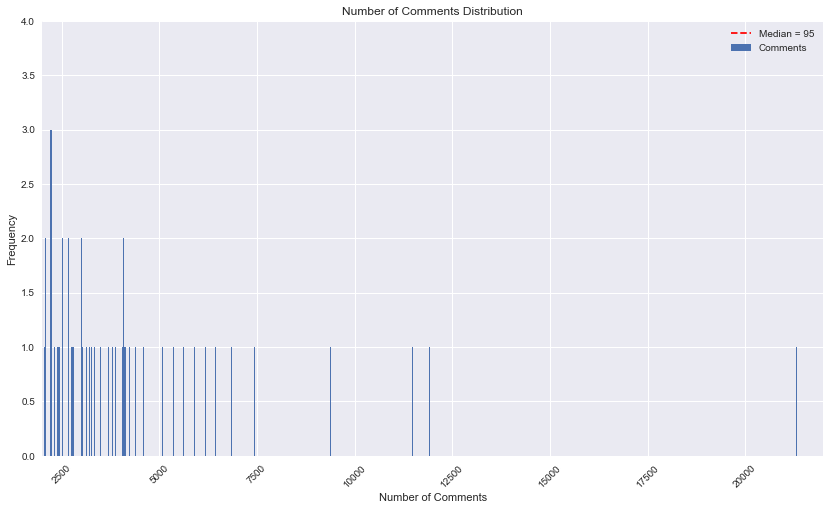

### A look at the overall distribution of post domain sources...

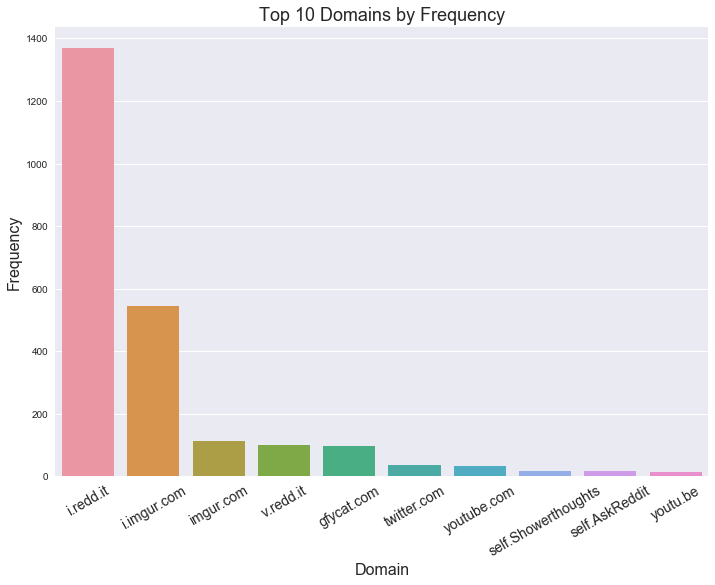

### A look at the overall distribution of what time of day posts are created...

    Peaks are noticed at approximately 9am EST, while troughs are at approximately 11pm EST

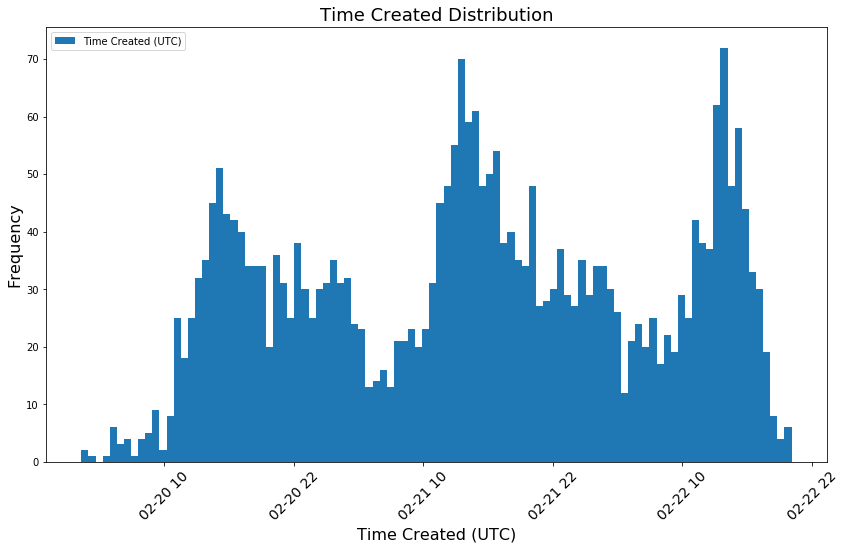

---

## Exploring how the number of comments typically grow over time

There are two things I noticed that are going to introduce some strange noise to our data:
    1. Since our scraper only ran for 48 hours, our dataset will include some "young" posts, that have not totally "matured" yet in total comment number.
    2. How long a post is allowed by Reddit to occupy a spot in the "Top" section is a bit of a black box. Some seem to be terminated more quickly than others, so it may not be based exclusively on an overall duration.

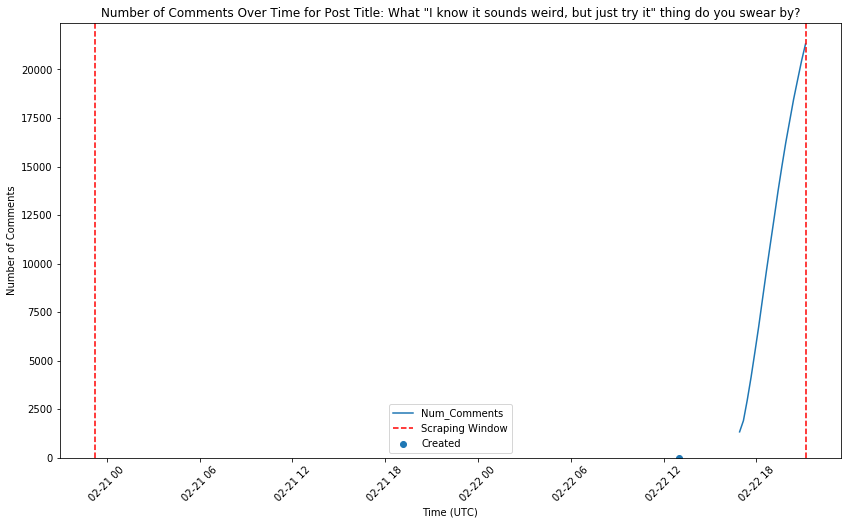

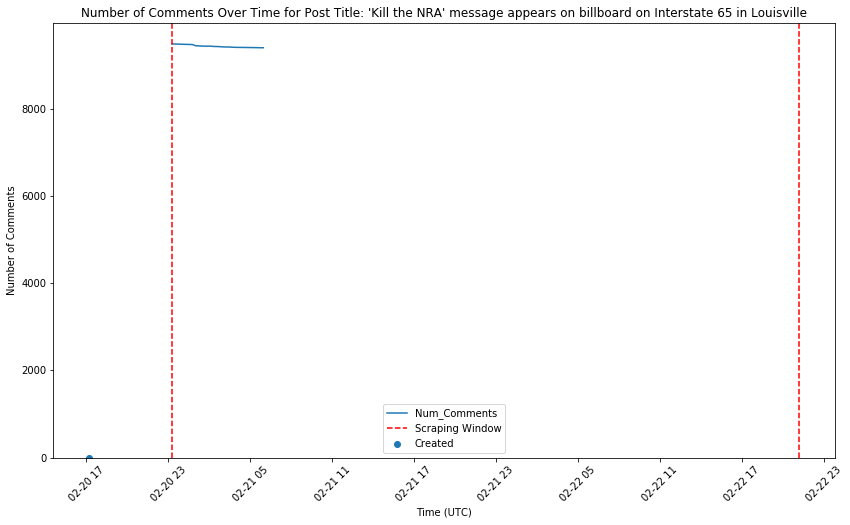

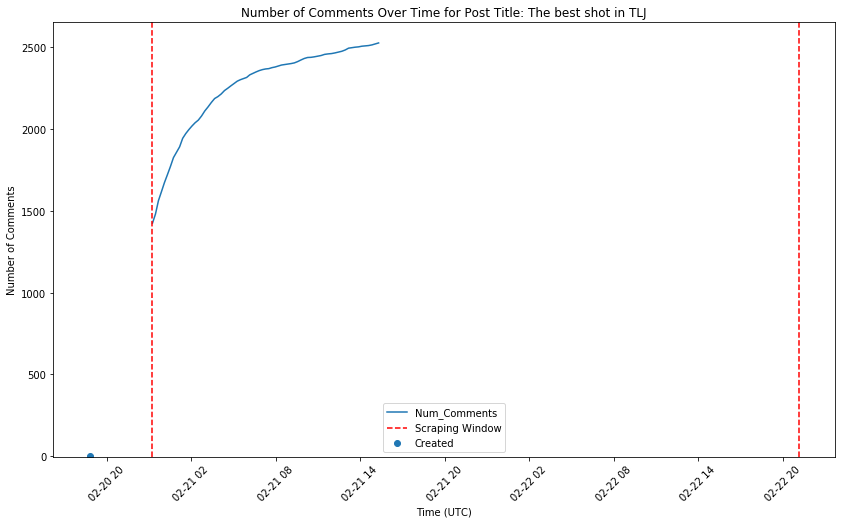

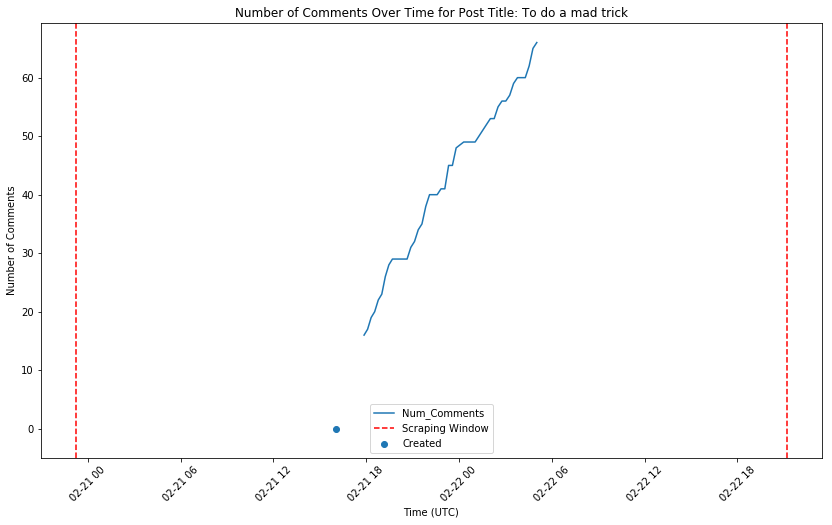

---

## The Most Important Text in determining High/Low Comment Engagement:

### ...In the Subreddit Title

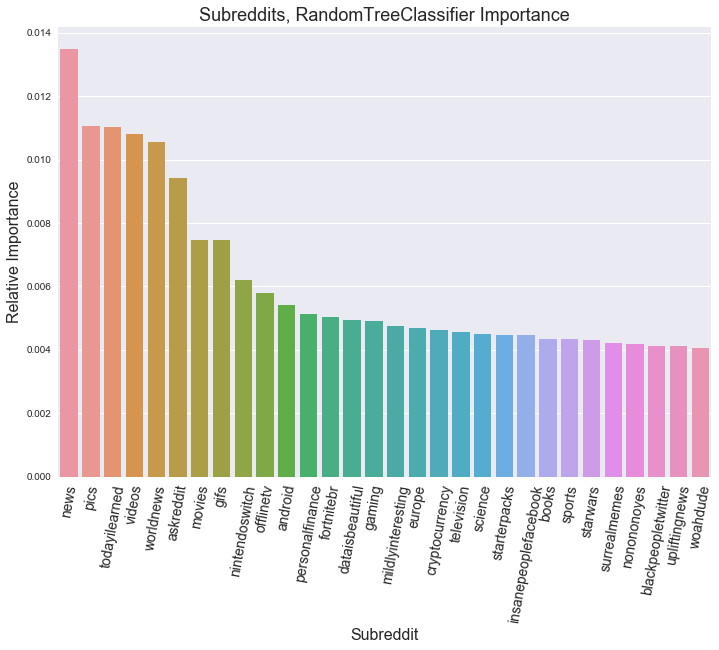

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.barplot(x_imp[0:30], y_imp[0:30])
g.set_title('Subreddits, RandomTreeClassifier Importance', fontsize=18)
g.set_xlabel('Subreddit', fontsize=16)
g.set_ylabel('Relative Importance', fontsize=16)
g.set_xticklabels(x_imp[0:30], rotation=80, fontsize=14);

### ...In the Post Title

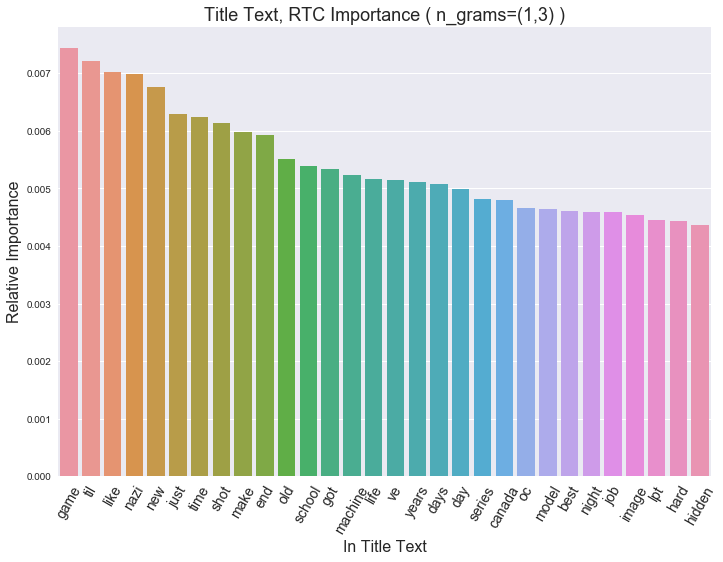

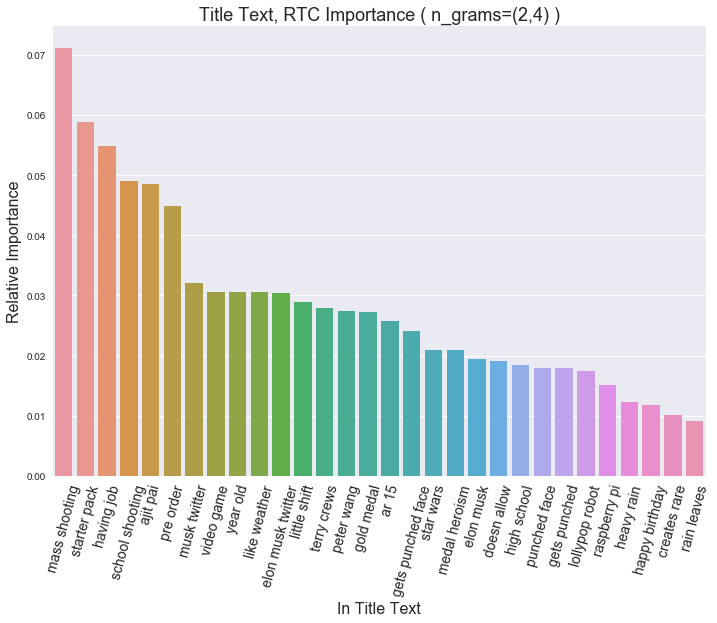

### ...In the domain name

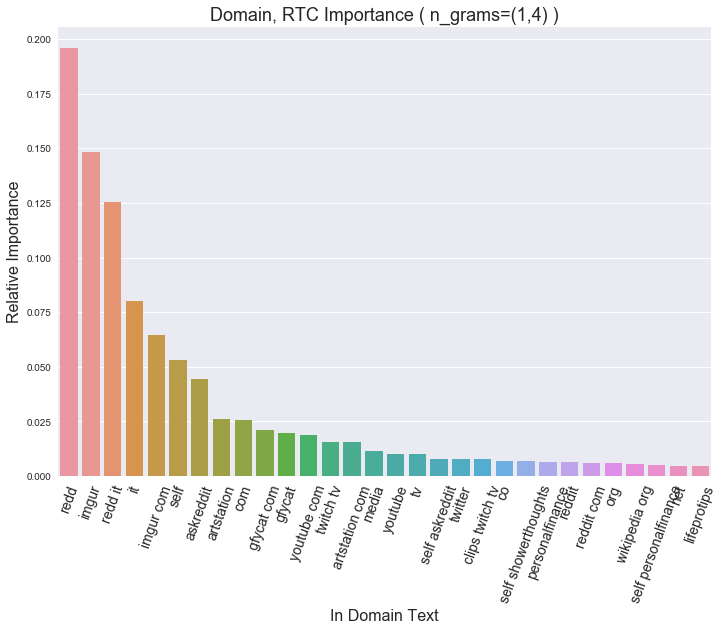

### ...Within the text of the post (if any was included, usually there is not)

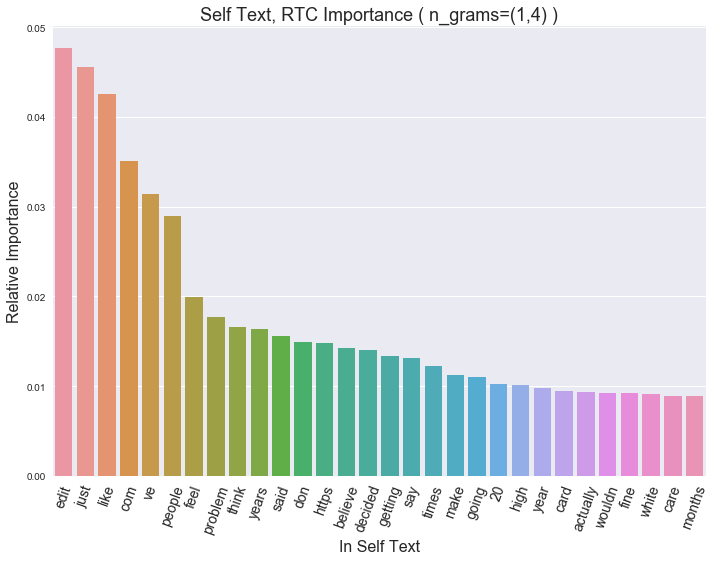

---

## Confusion Matrix of Random Tree Classifier, optimized with Grid Search

,Pred 0,Pred 1
Act 0,362,58
Act 1,97,346
